In [910]:
!python -m pip install --upgrade graphviz

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [911]:
import numpy as np # linear algebra
import spacy
nlp = spacy.load('en_core_web_sm')
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string
import re
from collections import Counter
from time import time
# from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS as stopwords
from nltk.corpus import stopwords
import nltk
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
%matplotlib inline
import heapq
from nltk                            import FreqDist
import gensim
from gensim                          import corpora
import pyLDAvis
import pyLDAvis.gensim_models as gensim
from gensim.models                   import LdaModel
from sklearn.ensemble                import RandomForestClassifier
from sklearn.tree                    import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer, CountVectorizer
from sklearn.metrics                 import classification_report
from sklearn.pipeline                import FeatureUnion
from sklearn.pipeline                import Pipeline
from sklearn.base                    import BaseEstimator, TransformerMixin
from sklearn.decomposition           import NMF, LatentDirichletAllocation
from sklearn.model_selection         import train_test_split
from sklearn.model_selection         import RandomizedSearchCV
from sklearn                         import metrics
from typing                          import List
from sklearn                         import tree

from xgboost                         import XGBClassifier
from xgboost                         import plot_tree
import graphviz
import itertools

stopwords = stopwords.words('english')
sns.set_context('notebook')

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [912]:
# extra step to allow graphviz to be found 
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/pinba/anaconda3/Library/bin/graphviz'

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [913]:
class ItemSelector(BaseEstimator
                  ,TransformerMixin):
    """
    Parameters
    ----------
    key : hashable, required
        The key corresponding to the desired value in a mappable.
    """
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [914]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += ", ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()


C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [915]:
def extract_feature_names(model, name) -> List[str]:

    if hasattr(model, "get_feature_names"):
        return model.get_feature_names()
    elif hasattr(model, "n_clusters"):
        return [f"{name}_{x}" for x in range(model.n_clusters)]
    elif hasattr(model, "n_components"):
        return [f"{name}_{x}" for x in range(model.n_components)]
    elif hasattr(model, "components_"):
        n_components = model.components_.shape[0]
        return [f"{name}_{x}" for x in range(n_components)]
    elif hasattr(model, "classes_"):
        return classes_
    else:
        return [name]

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [916]:
#reviews = pd.read_csv("north_avg_reviews - Sheet1.csv", encoding='latin1')
#reviews = pd.read_csv("SCHOOL_RATING - Sheet1.csv", encoding='latin1')
reviews = pd.read_csv("Diabetic Ulcers Reasearch Summary - Sheet1.csv", encoding='latin1')
reviews = reviews.dropna()

reviews['Review'] = reviews['Title']


# remove formatting and short stuff
#reviews.drop(reviews[reviews.Review.str.len() < 49].index, inplace=True)

print(reviews.shape)
reviews.head(25)


(40, 15)


C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Index,Source,Date,Topic,Title,Background,Method,Results,Conclusions,Study Size,Rating,References,Citations,Comments,Review
0,1,The New England Journal of Medicine,6/25/2021,Diabetes,Tirzepatide versus Semaglutide Once Weekly in ...,Tirzepatide is a dual glucose-dependent insuli...,"In an open-label, 40-week, phase 3 trial, we r...",The estimated mean change from baseline in the...,"In patients with type 2 diabetes, tirzepatide ...",1879,5,0,0,0,Tirzepatide versus Semaglutide Once Weekly in ...
1,2,The New England Journal of Medicine,3/25/2021,Diabetes,A Placebo-Controlled Trial of Subcutaneous Sem...,Nonalcoholic steatohepatitis (NASH) is a commo...,"We conducted a 72-week, double-blind phase 2 t...","In total, 320 patients (of whom 230 had stage ...",This phase 2 trial involving patients with NAS...,320,5,0,0,0,A Placebo-Controlled Trial of Subcutaneous Sem...
2,3,The New England Journal of Medicine,1/14/2021,Diabetes,Sotagliflozin in Patients with Diabetes and Re...,Sodiumâglucose cotransporter 2 (SGLT2) inhib...,"We performed a multicenter, double-blind trial...",A total of 1222 patients underwent randomizati...,In patients with diabetes and recent worsening...,1222,7,49,81,0,Sotagliflozin in Patients with Diabetes and Re...
3,4,The New England Journal of Medicine,12/3/2020,Diabetes,Effect of Finerenone on Chronic Kidney Disease...,"Finerenone, a nonsteroidal, selective mineralo...","In this double-blind trial, we randomly assign...","During a median follow-up of 2.6 years, a prim...","In patients with CKD and type 2 diabetes, trea...",5734,7,24,112,0,Effect of Finerenone on Chronic Kidney Disease...
4,5,The New England Journal of Medicine,11/26/2020,Diabetes,Once-Weekly Insulin for Type 2 Diabetes withou...,It is thought that a reduction in the frequenc...,"We conducted a 26-week, randomized, double-bli...",A total of 247 participants were randomly assi...,Once-weekly treatment with insulin icodec had ...,247,7,16,33,4,Once-Weekly Insulin for Type 2 Diabetes withou...
5,6,The New England Journal of Medicine,11/19/20,Diabetes,Golimumab and Beta-Cell Function in Youth with...,Type 1 diabetes is an autoimmune disease chara...,"In this phase 2, multicenter, placebo-controll...",A total of 84 participants underwent randomiza...,Among children and young adults with newly dia...,84,6,42,10,0,Golimumab and Beta-Cell Function in Youth with...
6,7,The New England Journal of Medicine,10/8/2020,Diabetes,Dapagliflozin in Patients with Chronic Kidney ...,Patients with chronic kidney disease have a hi...,We randomly assigned 4304 participants with an...,The independent data monitoring committee reco...,"Among patients with chronic kidney disease, re...",4304,8,20,364,0,Dapagliflozin in Patients with Chronic Kidney ...
7,8,The New England Journal of Medicine,10/8/2020,Diabetes,Cardiovascular Outcomes with Ertugliflozin in ...,"The cardiovascular effects of ertugliflozin, a...","In a multicenter, double-blind trial, we rando...",A total of 8246 patients underwent randomizati...,Among patients with type 2 diabetes and athero...,8246,5,17,186,0,Cardiovascular Outcomes with Ertugliflozin in ...
8,9,The New England Journal of Medicine,8/27/2020,Diabetes,A Randomized Trial of Closed-Loop Control in C...,A closed-loop system of insulin delivery (also...,"In a 16-week, multicenter, randomized, open-la...",A total of 101 children underwent randomizatio...,In this 16-week trial involving children with ...,101,6,23,51,0,A Randomized Trial of Closed-Loop Control in C...
9,10,The New England Journal of Medicine,8/20/2020,Diabetes,Effects of Diet versus Gastric Bypass on Metab...,Some studies have suggested that in people wit...,We evaluated metabolic regulators of glucose h...,Weight loss was associated with increases in m...,In this study involving patients with obesity ...,22,6,39,41,0,Effects of Diet versus Gastric Bypass on Metab...


In [917]:

nlp = spacy.load('en_core_web_lg')
def normalize_text(text):
    tm1 = re.sub('<pre>.*?</pre>', '', text, flags=re.DOTALL)
    tm2 = re.sub('<code>.*?</code>', '', tm1, flags=re.DOTALL)
    tm3 = re.sub('<[^>]+>©', '', tm1, flags=re.DOTALL)
    return tm3.replace("\n", "")

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [918]:
# in this step we are going to remove code syntax from text 
reviews['Review_Cleaned_1'] = reviews['Review'].apply(normalize_text)

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [919]:
punctuations = '!"#$%&\'()*+,-/:;<=>?@[\\]^_`{|}~©'
# Define function to cleanup text by removing personal pronouns, stopwords, and puncuation
def cleanup_text(docs, logging=False):
    texts = []
    doc = nlp(docs, disable=['parser', 'ner'])
    tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
    tokens = [tok for tok in tokens if tok not in stopwords and tok not in punctuations]
    tokens = ' '.join(tokens)
    texts.append(tokens)
    return pd.Series(texts)


reviews['Review_Cleaned'] = reviews['Review_Cleaned_1'].apply(lambda x: cleanup_text(x, False))

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [920]:
def generate_summary(text_without_removing_dot, cleaned_text):
    sample_text = text_without_removing_dot
    doc = nlp(sample_text)
    sentence_list=[]
    for idx, sentence in enumerate(doc.sents): # we are using spacy for sentence tokenization
        sentence_list.append(re.sub(r'[^\w\s]','',str(sentence)))

    stopwords = nltk.corpus.stopwords.words('english')

    word_frequencies = {}  
    for word in nltk.word_tokenize(cleaned_text):  
        if word not in stopwords:
            if word not in word_frequencies.keys():
                word_frequencies[word] = 1
            else:
                word_frequencies[word] += 1


    maximum_frequncy = max(word_frequencies.values())

    for word in word_frequencies.keys():  
        word_frequencies[word] = (word_frequencies[word]/maximum_frequncy)


    sentence_scores = {}  
    for sent in sentence_list:  
        for word in nltk.word_tokenize(sent.lower()):
            if word in word_frequencies.keys():
                if len(sent.split(' ')) < 30:
                    if sent not in sentence_scores.keys():
                        sentence_scores[sent] = word_frequencies[word]
                    else:
                        sentence_scores[sent] += word_frequencies[word]


    summary_sentences = heapq.nlargest(7, sentence_scores, key=sentence_scores.get)

    summary = ' '.join(summary_sentences)
    print("Original Text:\n")
    print(text_without_removing_dot)
    print('\n\nSummarized text:\n')
    print(summary)

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [921]:
# Load model to return language object
nlp = spacy.load('en_core_web_sm')
# Calling nlp on our tweet texts to return a processed Doc for each
reviews['doc'] = [nlp(Review) for Review in reviews.Review]
reviews.sample(3)

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Index,Source,Date,Topic,Title,Background,Method,Results,Conclusions,Study Size,Rating,References,Citations,Comments,Review,Review_Cleaned_1,Review_Cleaned,doc
10,11,The New England Journal of Medicine,6/25/2020,Diabetes,Serum Urate Lowering with Allopurinol and Kidn...,Higher serum urate levels are associated with ...,"In a double-blind trial, we randomly assigned ...",A total of 267 patients were assigned to recei...,We found no evidence of clinically meaningful ...,530,7,37,3,2,Serum Urate Lowering with Allopurinol and Kidn...,Serum Urate Lowering with Allopurinol and Kidn...,serum urate lower allopurinol kidney function ...,"(Serum, Urate, Lowering, with, Allopurinol, an..."
26,27,The New England Journal of Medicine,8/2/2018,Diabetes,A Copeptin-Based Approach in the Diagnosis of ...,The indirect water-deprivation test is the cur...,"From 2013 to 2017, we recruited 156 patients w...",A total of 144 patients underwent both tests. ...,The direct measurement of hypertonic salineâ...,144,0,37,75,0,A Copeptin-Based Approach in the Diagnosis of ...,A Copeptin-Based Approach in the Diagnosis of ...,copeptin base approach diagnosis diabetes insi...,"(A, Copeptin, -, Based, Approach, in, the, Dia..."
4,5,The New England Journal of Medicine,11/26/2020,Diabetes,Once-Weekly Insulin for Type 2 Diabetes withou...,It is thought that a reduction in the frequenc...,"We conducted a 26-week, randomized, double-bli...",A total of 247 participants were randomly assi...,Once-weekly treatment with insulin icodec had ...,247,7,16,33,4,Once-Weekly Insulin for Type 2 Diabetes withou...,Once-Weekly Insulin for Type 2 Diabetes withou...,weekly insulin type 2 diabete without previous...,"(Once, -, Weekly, Insulin, for, Type, 2, Diabe..."


C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

C:\Users\pinba\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



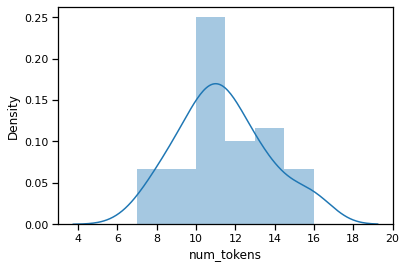

In [922]:
# Sum the number of tokens in each Doc
reviews['num_tokens'] = [len(token) for token in reviews.doc]
# Visualize histogram of tokens per tweet
g = sns.distplot(reviews.num_tokens)

In [923]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



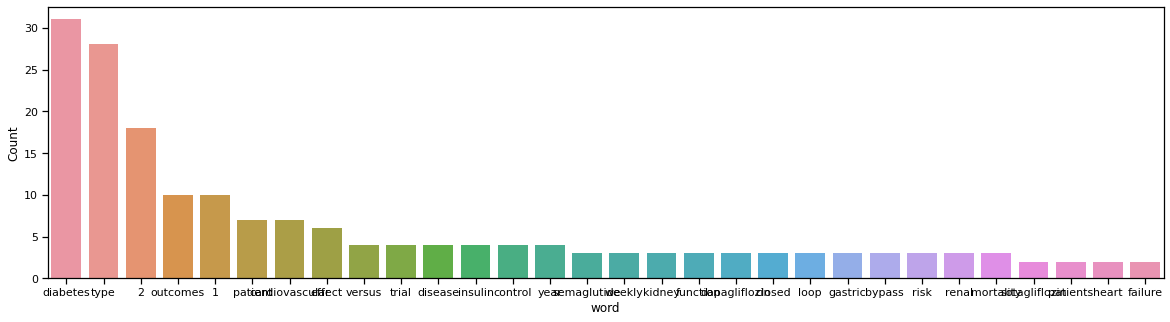

In [924]:
freq_words(reviews['Review_Cleaned'])

In [925]:
# remove unwanted characters, numbers and symbols
reviews['Review_Cleaned'] = reviews['Review_Cleaned'].str.replace("[^a-zA-Z#]", " ")

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-925-f2c53fdd6a2a>:2: FutureWarning:

The default value of regex will change from True to False in a future version.



In [926]:
# function to remove stopwords
def remove_stopwords(rev):
    stop_words = nltk.corpus.stopwords.words('english')
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

reviews_org = reviews

# remove short words (length < 3)
reviews['Review_Cleaned'] = reviews['Review_Cleaned'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviews['Review_Cleaned'] = [remove_stopwords(r.split()) for r in reviews['Review_Cleaned']]

# make entire text lowercase
reviews['Review_Cleaned'] = [r.lower() for r in reviews['Review_Cleaned']]

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



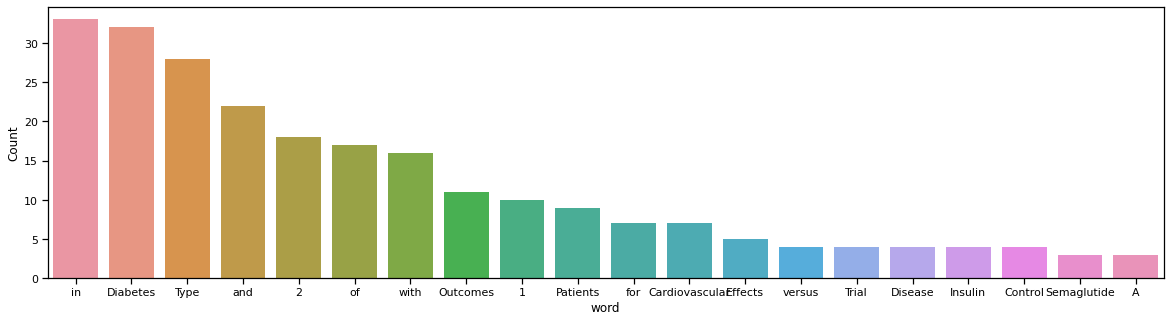

In [927]:
freq_words(reviews.Review_Cleaned_1, 20);

In [928]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def lemmatization(texts, tags=['NOUN', 'ADJ']): # filter noun and adjective
       output = []
       for sent in texts:
             doc = nlp(" ".join(sent)) 
             output.append([token.lemma_ for token in doc if token.pos_ in tags])
       return output

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [929]:
reviews.sample(3)

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Index,Source,Date,Topic,Title,Background,Method,Results,Conclusions,Study Size,Rating,References,Citations,Comments,Review,Review_Cleaned_1,Review_Cleaned,doc,num_tokens
35,36,The New England Journal of Medicine,8/17/2017,Diabetes,Canagliflozin and Cardiovascular and Renal Eve...,Canagliflozin is a sodiumâglucose cotranspor...,The CANVAS Program integrated data from two tr...,The mean age of the participants was 63.3 year...,In two trials involving patients with type 2 d...,10142,0,24,3002,0,Canagliflozin and Cardiovascular and Renal Eve...,Canagliflozin and Cardiovascular and Renal Eve...,canagliflozin cardiovascular renal events type...,"(Canagliflozin, and, Cardiovascular, and, Rena...",10
21,22,The New England Journal of Medicine,10/18/2018,Diabetes,Effects of Aspirin for Primary Prevention in P...,Diabetes mellitus is associated with an increa...,We randomly assigned adults who had diabetes b...,"A total of 15,480 participants underwent rando...",Aspirin use prevented serious vascular events ...,15480,0,24,416,0,Effects of Aspirin for Primary Prevention in P...,Effects of Aspirin for Primary Prevention in P...,effect aspirin primary prevention person diabe...,"(Effects, of, Aspirin, for, Primary, Preventio...",11
18,19,The New England Journal of Medicine,6/6/2019,Diabetes,Intensive Glucose Control in Patients with Typ...,We previously reported that a median of 5.6 ye...,We observationally followed enrolled participa...,There were 1655 participants in the complete c...,Participants with type 2 diabetes who had been...,1655,0,34,88,0,Intensive Glucose Control in Patients with Typ...,Intensive Glucose Control in Patients with Typ...,intensive glucose control patient type diabete...,"(Intensive, Glucose, Control, in, Patients, wi...",16


In [930]:
tokenized_reviews = pd.Series(reviews.Review_Cleaned_1).apply(lambda x: x.split())
print(tokenized_reviews)

0     [Tirzepatide, versus, Semaglutide, Once, Weekl...
1     [A, Placebo-Controlled, Trial, of, Subcutaneou...
2     [Sotagliflozin, in, Patients, with, Diabetes, ...
3     [Effect, of, Finerenone, on, Chronic, Kidney, ...
4     [Once-Weekly, Insulin, for, Type, 2, Diabetes,...
5     [Golimumab, and, Beta-Cell, Function, in, Yout...
6     [Dapagliflozin, in, Patients, with, Chronic, K...
7     [Cardiovascular, Outcomes, with, Ertugliflozin...
8     [A, Randomized, Trial, of, Closed-Loop, Contro...
9     [Effects, of, Diet, versus, Gastric, Bypass, o...
10    [Serum, Urate, Lowering, with, Allopurinol, an...
11    [Dapagliflozin, in, Patients, with, Heart, Fai...
12    [Six-Month, Randomized,, Multicenter, Trial, o...
13    [Ticagrelor, in, Patients, with, Stable, Coron...
14    [Oral, Semaglutide, and, Cardiovascular, Outco...
15    [An, Anti-CD3, Antibody,, Teplizumab,, in, Rel...
16    [Vitamin, D, Supplementation, and, Prevention,...
17    [Canagliflozin, and, Renal, Outcomes, in, 

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [931]:
reviews_2 = lemmatization(tokenized_reviews)
print(reviews_2) # print lemmatized review

print(len(reviews_2))

[['tirzepatide', 'diabetes'], [], ['failure'], ['effect', 'diabetes'], [], ['diabetes'], [], ['diabetes'], ['diabetes'], ['effect', 'diabetes'], ['type', 'diabetes'], [], ['month', 'diabetes'], [], ['diabetes'], ['risk', 'type', 'diabetes'], ['vitamin', 'diabetes'], [], ['intensive', 'diabetes', 'up'], ['year', 'adult'], ['diabetes'], ['effect'], ['effect'], ['risk', 'factor', 'diabetes'], ['diabetes', 'mortality'], [], ['diagnosis', 'diabetes'], [], ['type', 'diabetes'], ['effect', 'diabetes'], ['diabetes'], ['effect', 'diabetes'], ['year'], ['diabetes'], ['diabetes'], ['event', 'type', 'diabetes'], ['frequency', 'type', 'diabetes'], ['type', 'diabetes'], ['type', 'diabetes'], ['diabetes', 'year', 'outcome']]
40


C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



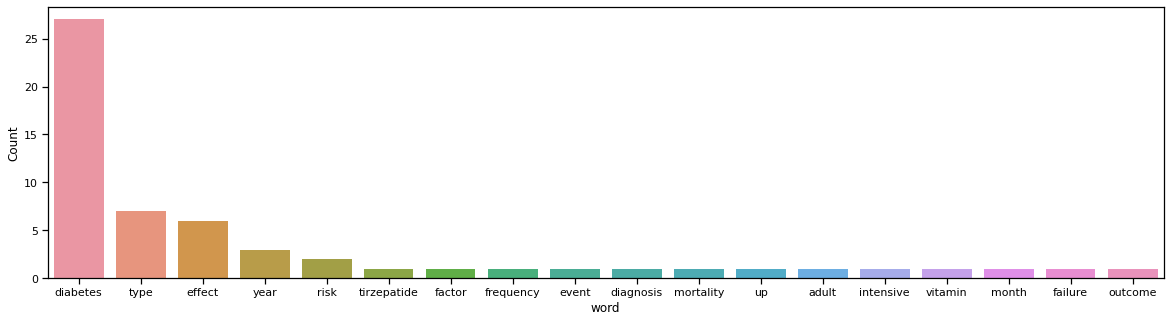

In [932]:
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))

freq_words(reviews_3, 20)

In [933]:
dictionary = corpora.Dictionary(reviews_2)

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [934]:
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [935]:
# Creating the object for LDA model using gensim library
# LDA = gensim.models.ldamodel.LdaModel
LDA = LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=7, random_state=100,
                chunksize=1000, passes=50)

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [936]:
#lda_model.print_topics(num_words=4)
#lda_model.show_topics(num_words=4)
len(reviews_3)

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



40

In [937]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.215674 -0.098166       1        1  29.593011
2     -0.152789  0.130888       2        1  28.017184
4     -0.014753 -0.039492       3        1  14.944685
5     -0.002078 -0.009333       4        1   8.765510
3      0.194380 -0.036587       5        1   8.047326
1      0.115031  0.034178       6        1   5.747165
0      0.075883  0.018511       7        1   4.885118, topic_info=        Term      Freq      Total Category  logprob  loglift
11      year  3.000000   3.000000  Default  18.0000  18.0000
4       type  6.000000   6.000000  Default  17.0000  17.0000
2    failure  1.000000   1.000000  Default  16.0000  16.0000
3     effect  4.000000   4.000000  Default  15.0000  15.0000
9         up  1.000000   1.000000  Default  14.0000  14.0000
..       ...       ...        ...      ...      ...      ...
6       risk  0.157410   2.430729   Topic7  -2.8904   0.2819
11      year  0.157409   3.352653   Topic7  -2.8904  -0.0397
3     effect  0.157411   4.734460   Topic7  -2.8904  -0.3848
4       type  0.157409   6.130671   Topic7  -2.8904  -0.6432
0   diabetes  0.157416  19.948339   Topic7  -2.8903  -1.8230

[144 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
10        5  0.589854        adult
0         1  0.501295     diabetes
0         2  0.300777     diabetes
0         3  0.150388     diabetes
0         4  0.050129     diabetes
14        2  0.620731    diagnosis
3         1  0.844869       effect
15        2  0.620731        event
12        3  0.596151       factor
2         6  0.558328      failure
16        2  0.620731    frequency
8         4  0.564987    intensive
5         1  0.664960        month
13        1  0.664960    mortality
17        3  0.596151      outcome
6         2  0.411399         risk
6         3  0.411399         risk
1         3  0.596151  tirzepatide
4         2  0.815571         type
9         4  0.564987           up
7         1  0.664960      vitamin
11        3  0.298271         year
11        5  0.596542         year, R=18, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 3, 5, 6, 4, 2, 1])

In [938]:
reviews_4 = reviews
reviews_4['Rating']

# low rating
#reviews_4['Rating_binary'] = reviews_4['Rating'].apply(lambda x: 1 if x > 3 else 0)

reviews_4['Rating_binary'] = reviews_4['Citations'].apply(lambda x: 1 if x > 300 else 0)

# high rating
# reviews_4['Rating_binary'] = reviews_4['Rating'].apply(lambda x: 1 if x < 2 else 0)

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [939]:

## wrapper to support numerical quant hyper-parameters
def parameter_type_conv(parameter
                       ,parameter_type):
    if parameter_type == 'int':
        return round(parameter, 0)
    else:
        return parameter

    
## generate array to support hierarchial hyper-parameterization    
def auto_term_frequency_max(parameter_array_seed
                           ,parameter_max
                           ,parameter_min
                           ,parameter_seed_rate
                           ,parameter_type
                           ,print_result): 
    
    
    hyper_parameter_array = (
                                 parameter_type_conv(parameter_array_seed*(1-(parameter_seed_rate*2))
                                                    ,parameter_type)
                                ,parameter_type_conv(parameter_array_seed*(1-(parameter_seed_rate*1))
                                                    ,parameter_type)
                                ,parameter_type_conv(parameter_array_seed
                                                    ,parameter_type)
                                ,parameter_type_conv(parameter_array_seed*(1+(parameter_seed_rate*1))
                                                    ,parameter_type)        
                                ,parameter_type_conv(parameter_array_seed*(1+(parameter_seed_rate*2))
                                                    ,parameter_type) )
    
    
    
    if print_result:
        print(hyper_parameter_array)
    
    return hyper_parameter_array
    

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [940]:

auto_term_frequency_max(.5        # seed value, previous nominal hyper-parameter
                       ,2         # hyper-parameter(s) max value
                       ,0         # hyper-parameter(s) min value
                       ,0.2       # hyper-parameter(s) range growth rate
                       ,'float'   # output numerical type (float/int)
                       ,True)     # print array for all the people to see

(0.3, 0.4, 0.5, 0.6, 0.7)


C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(0.3, 0.4, 0.5, 0.6, 0.7)

In [949]:
#y=reviews_4['Rating']
y=reviews_4['Rating_binary']
y=y.astype('int')

X=reviews_4[['Title', 'Background', 'Method', 'Conclusions']].fillna('BLANK')


C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [942]:
def auto_paramterization(comment_term_freq):
    
    parameters = [
        {'union__review__vectorizer':                      [HashingVectorizer()],
            'union__review__vectorizer__stop_words':       ('english', None),

            # ngram ranges         
            'union__review__vectorizer__ngram_range':      ((1, 1)        # force single term
                                                           ,(1, 4)        # full spectrum up-to 4 term combination 
                                                           ,(2, 4)),      # force combination

            'classifier':                                  [XGBClassifier()],
        },
                  
                   
                  
        {
            #'union__review__vectorizer':                   [CountVectorizer()],
            'union__review__vectorizer':                   [TfidfVectorizer()],
            'union__review__vectorizer__stop_words':       ('english', None),   
            #'union__review__vectorizer__analyzer':         ('word', 'char', 'char_wb'),

            # max term document frequecn#y
            'union__review__vectorizer__max_df':           comment_term_freq,  
            
            # max features in term frequency 
            'union__review__vectorizer__max_features':     (100, 1000, 10000),            
                       
            # ngram ranges         
            'union__review__vectorizer__ngram_range':      ((1, 1)        # force single term
                                                           ,(1, 4)        # full spectrum up-to 4 term combination 
                                                           ,(2, 4)),      # force combination        

            'classifier':                                  [XGBClassifier()],
        },
              
        {
            'union__review__vectorizer':                   [TfidfVectorizer()],
            'union__review__vectorizer__stop_words':       ('english', None),    
            
            # max term document frequecn#y
            'union__review__vectorizer__max_df':           comment_term_freq,  
            
            # max features in term frequency 
            'union__review__vectorizer__max_features':     (100, 1000, 10000),                  

            # ngram ranges         
            'union__review__vectorizer__ngram_range':      ((1, 1)        # force single term
                                                           ,(1, 4)        # full spectrum up-to 4 term combination 
                                                           ,(2, 4)),      # force combination        

            'classifier':                                  [XGBClassifier()],
        }]
    



    return parameters

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [943]:
  # parrallel hyper-parameterization
def make_param_grids(steps, param_grids):

    final_params=[]

    # Itertools.product will do a permutation such that 
    # (pca OR svd) AND (svm OR rf) will become ->
    # (pca, svm) , (pca, rf) , (svd, svm) , (svd, rf)
    for estimator_names in itertools.product(*steps.values()):
        current_grid = {}

        # Step_name and estimator_name should correspond
        # i.e preprocessor must be from pca and select.
        for step_name, estimator_name in zip(steps.keys(), estimator_names):
            for param, value in param_grids.get(estimator_name).items():
                
                # detect object
                if param == 'object':
                    # Set actual estimator in pipeline
                    current_grid[step_name]=[value]
                else:
                    # Set parameters corresponding to above estimator
                    current_grid[step_name+'__'+param]=value
        #Append this dictionary to final params            
        final_params.append(current_grid)

    return final_params

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [944]:
# add all the estimators you want to "OR" in single key
# use OR between `pca` and `select`, 
# use OR between `svm` and `rf`
# different keys will be evaluated as serial estimator in pipeline



pipeline_steps = {'selector_switch':['switch'],                 
                  'preprocessor':   ['tfidf', 'count'],
                  'topicizer':      ['lda'],                   
                  'classifier':     ['xgb']}

def evolving_grid(max_df_evolving_array):
    # fill parameters to be searched in this dict
    all_param_grids = {'xgb':{'object':           XGBClassifier(use_label_encoder=False),
                              #'n_estimators':     (10, 20),
                              #'min_child_weight': [1, 5, 10],
                              #'gamma':            [0.5, 1, 1.5, 2, 5],
                              #'subsample':        [0.6, 0.8, 1.0],
                              #'colsample_bytree': [0.6, 0.8, 1.0],
                              #'max_depth':        [3, 4, 5],
                              #'eval_metric':      ['mlogloss', 'logloss']
                             }, 


                       'rf':{'object':            RandomForestClassifier(),
                             'n_estimators':      (10, 200),
                            },


                       'tfidf':{'object':         TfidfVectorizer(),
                              'max_df':           max_df_evolving_array,  
                              'max_features':     (100, 1000, 10000),
                              'stop_words':       ('english', None), 
                              'ngram_range':      ((1, 1)        # force single term
                                                  ,(1, 4)        # full spectrum up-to 4 term combination 
                                                  ,(2, 4)),      # force combination    
                             },

                       ## passthrough mech.
                       'passthrough':{'object':   'passthrough'},                   


                       'count':{'object':CountVectorizer(),
                                 'max_features':  (100, 1000, 10000)
                                },

                       'lda':{'object':           LatentDirichletAllocation(learning_method='online'),
                               'learning_offset': (5, 50, 100),
                               'learning_decay':  (0.5, 0.75, 0.9),
                               'n_components':    (4, 5, 6, 7, 8)
                             },               

                       'switch':{'object':        ItemSelector(key='salad'),
                                    'key':        ('Title', 'Background', 'Method', 'Conclusions')}                   
                      }  
    return all_param_grids


# Call the method on the above declared variables
# param_grids_list = make_param_grids(pipeline_steps, evolving_grid(1))

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [945]:
# The PCA() and SVC() used here are just to initialize the pipeline,
# actual estimators will be used from our `param_grids_list`
pipe = Pipeline(steps=[('selector_switch','passthrough')
                       , ('preprocessor', 'passthrough')
                       , ('topicizer',    'passthrough')
                       , ('classifier',   'passthrough')])  

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [950]:
# broad search seed
classifier_iterator_preload = 50
evolution_domain = (0.7, 0.8, 1)
auto_max_term_frq = (0.9, 0.8, 0.7, .5, .3, .1, .01)
test_train_enabled = False


# initialize timer
t0_total = time()

for evolution_state in evolution_domain:

    # initialize timer
    t0 = time()

    # check if test train enabled
    if test_train_enabled:
        # training set evolver
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=evolution_state)
    else:
        X_train=X; X_test=X
        y_train=y; y_test=y

    
    dyn_parameter_grid = make_param_grids(pipeline_steps
                                         ,evolving_grid(auto_max_term_frq))
        
    grid_search = RandomizedSearchCV(pipe
                                     ,dyn_parameter_grid
                                     ,n_iter=classifier_iterator_preload*evolution_state
                                     #,scoring='adjusted_mutual_info_score'
                                     #,scoring='roc_auc'
                                     ,scoring='homogeneity_score'
                                    )

    # fit gridsearch / pipeline
    grid_search.fit(X_train, y_train)

    # search metrics
    print("search iteration train ratio %0.3f rows %0.1f" % (0.1 ,len(y_train)))
    print("done in %0.3fs" % (time() - t0))
    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")

    # grid search parameters
    best_parameters = grid_search.best_estimator_.get_params()

    # loop through each parameter, displaying top result
    i=0
    #for param_name in sorted(parameters[0]):
    #for param_name in sorted(param_grids_list[0]):
    for param_name in sorted(dyn_parameter_grid[0]):                                          
        print("(%r): \t%s  %r" % (i, param_name, best_parameters[param_name]))

        # record recent heights
        # if param_name = 'union__review__vectorizer__max_df':
        if 'preprocessor__max_df' in param_name:
            auto_max_term_frq = (
                                 auto_term_frequency_max(best_parameters[param_name]  # seed value, previous nominal hyper-parameter
                                                         ,2                           # hyper-parameter(s) max value
                                                         ,0                           # hyper-parameter(s) min value
                                                         ,0.2                         # hyper-parameter(s) range growth rate
                                                         ,'float'                     # output numerical type (float/int)
                                                         ,False)                      # print hyper parameter array?
                                )
            print("Iterative Adjusted Term Freq Ranges")
            print(auto_max_term_frq)
        i=i+1

    y_pred = grid_search.predict(X_test)
    print("")
    print("TEST - confusion matrix")
    print(metrics.confusion_matrix(y_test, y_pred))
    print("TEST - accuracy score")
    print(metrics.accuracy_score(y_test, y_pred))    
    
    y_pred = grid_search.predict(X)
    print("")
    print("FULL - confusion matrix")
    print(metrics.confusion_matrix(y, y_pred))    
    print("FULL - accuracy score")
    print(metrics.accuracy_score(y, y_pred))
    print("## iteration end #####################################")
    print("")
    print("")


runtime = (time() - t0_total)
print("Total runtime %s seconds" % (runtime))
print("Total runtime %s minutes" % (runtime / 60))
    

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[05:59:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[05:59:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\pinba\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pinba\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pinba\anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\pinba\anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\pinba\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\pinba\anaconda3\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File

[05:59:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[05:59:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[05:59:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\pinba\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pinba\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pinba\anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\pinba\anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\pinba\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\pinba\anaconda3\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File

[05:59:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\pinba\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pinba\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pinba\anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\pinba\anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\pinba\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\pinba\anaconda3\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File

[05:59:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\pinba\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning:

One or more of the test scores are non-finite: [0.02062226 0.15086041 0.0577982  0.16021599 0.03400725 0.
 0.10500313 0.         0.09299311 0.11586529 0.09064131        nan
 0.24097007 0.10811691 0.03720712 0.0821902  0.28333895 0.10551889
 0.18038544 0.13742876 0.18420076 0.08188242 0.10535361 0.14701137
 0.07237085 0.23284026        nan 0.10975899 0.13320485 0.2001165
 0.35524873        nan 0.05847855 0.         0.12202376]



[05:59:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
search iteration train ratio 0.100 rows 40.0
done in 18.405s
Best score: 0.355
Best parameters set:
(0): 	classifier  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
    

[05:59:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[05:59:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[05:59:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[05:59:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[05:59:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[05:59:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[05:59:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[05:59:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[05:59:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[05:59:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[05:59:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[05:59:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[06:00:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:00:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:00:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:00:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[06:00:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:00:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:00:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:00:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[06:00:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:00:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:00:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:00:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[06:00:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:00:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:00:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:00:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [951]:
# Topic Importance (output)

# latent d. hyper parameter
#lda = dict(grid_search.best_estimator_.named_steps['union'].transformer_list).get('review').named_steps['lda']
topicizer = grid_search.best_estimator_.named_steps['topicizer']
topicizer_type = type(topicizer).__name__


# vectorizer hyper parameter
#vectorizer = dict(grid_search.best_estimator_.named_steps['union'].transformer_list).get('review').named_steps['vectorizer']
vectorizer = grid_search.best_estimator_.named_steps['preprocessor']
vectorizer_type = type(vectorizer).__name__

# get feature names based on vectorizer type
if 'CountVectorizer' in vectorizer_type:
    
    print('CountVectorizer')
    feature_names = vectorizer.get_feature_names()
    
elif 'TfidfVectorizer' in vectorizer_type:
    print('TfidfVectorizer')
    feature_names = vectorizer.get_feature_names()
else:
    print('Unknown Vectorizer')
    feature_names = sorted(vectorizer.vocabulary_.keys())

print(topicizer_type)
    
if "str" in topicizer_type:
    print('passthrough topic')
    
else:
    # print top topics / features
    print_top_words(topicizer
                   ,feature_names
                   ,7)


TfidfVectorizer
LatentDirichletAllocation
Topic #0: heart failure, failure, heart, for, among, significantly, or
Topic #1: of diabetes, kidney, of diabetes and, national institute, institute, institute of, national institute of
Topic #2: insulin, health, use, resulted in, resulted, significantly, among
Topic #3: to, cardiovascular, or, was, risk, who, by the
Topic #4: group, the use, the use of, use of, use, in the, insulin



C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



7
comment_nlp_topic__0    0.080606
comment_nlp_topic__1    0.125523
comment_nlp_topic__2    0.240952
comment_nlp_topic__3    0.065300
comment_nlp_topic__4    0.096182
comment_nlp_topic__5    0.275211
comment_nlp_topic__6    0.116226
dtype: float32


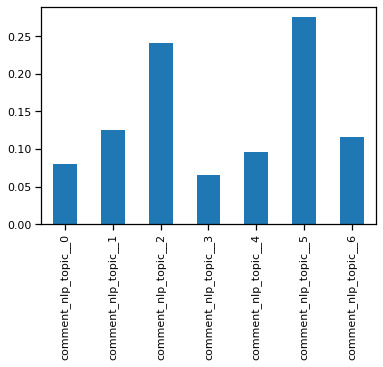

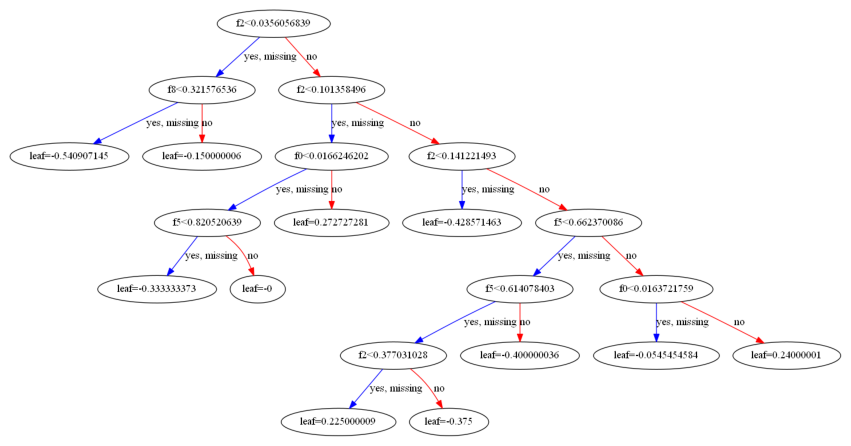

In [948]:


#print(grid_search.best_estimator_.named_steps['classifier'].feature_importances_)
#feature_names = grid_search.best_estimator_.named_steps['classifier'].get_feature_names()

clf_feature_importance = grid_search.best_estimator_.named_steps['classifier'].feature_importances_
print(len(clf_feature_importance))

#encoded_categorical_features = dict(grid_search.best_estimator_.named_steps['union'].transformer_list).get('repo_preprocessor').transformers_[1][1].get_feature_names()

# capture comment nlp topics
#comment_nlp_model = dict(grid_search.best_estimator_.named_steps['union'].transformer_list).get('review').named_steps['lda']
comment_nlp_topics = extract_feature_names(topicizer
                                          , 'comment_nlp_topic_')

features = np.array(list(comment_nlp_topics))

feature_importance = pd.Series(data=clf_feature_importance
                               , index = features )

print(feature_importance)
type(feature_importance)
feature_importance.plot.bar()

#plot_tree(clf)
#plt.show()

fig, ax = plt.subplots(figsize=(15, 15))
#xgb.plot_tree(clf, num_trees=4, ax=ax)
plot_tree(clf, ax=ax)
plt.show()
